In [1]:
import sys
from adaptive_latents.profiling_functions import get_speed_by_time, get_speed_per_step
from make_profiling_figure import make_data, bw_params
import adaptive_latents as al

import matplotlib.pyplot as plt
import numpy as np

import pdb

In [2]:
A, beh = make_data()

In [3]:
t = al.profiling_functions.get_speed_by_time(A, beh, prosvd_k=4, bw_params=bw_params, max_steps=5000)


[[-5.62529954e-02  7.83921176e-02 -5.11396977e-02  6.12795136e-02]
 [-7.76793615e-03 -6.05102634e-02 -3.81349206e-02  2.38638207e-02]
 [-5.90808743e-03 -3.86759191e-02 -3.48157508e-02  8.67347000e-03]
 [-7.29067242e-03  4.00052605e-03 -6.17787168e-03 -5.12886495e-03]
 [-5.66407369e-02  3.52007514e-02 -5.23167781e-02 -4.55718858e-02]
 [-1.21576314e-02  8.38458530e-03  8.00037266e-03  4.49351716e-03]
 [ 2.44911032e-03 -8.57865359e-02  7.46910879e-02 -8.54679706e-02]
 [-5.11559507e-02  2.00024606e-02 -4.06850964e-02 -4.10573256e-02]
 [-2.19729071e-02 -5.74325592e-02  2.44172528e-02  7.91144044e-03]
 [-3.22320568e-03  3.60758159e-03  8.11909647e-03  1.55419069e-02]
 [-5.97885338e-03  1.02392070e-02  8.60160557e-03  3.89640929e-03]
 [-4.59556118e-02  6.63173818e-02  9.22136074e-02  6.72629821e-02]
 [-1.67571188e-02 -2.34861129e-03 -1.14367938e-02 -9.29362869e-03]
 [-2.88121262e-01  1.54652443e-01 -1.79740680e-01 -1.90158729e-01]
 [-2.16139514e-02 -1.83892277e-02 -4.22663267e-02  2.23954880e

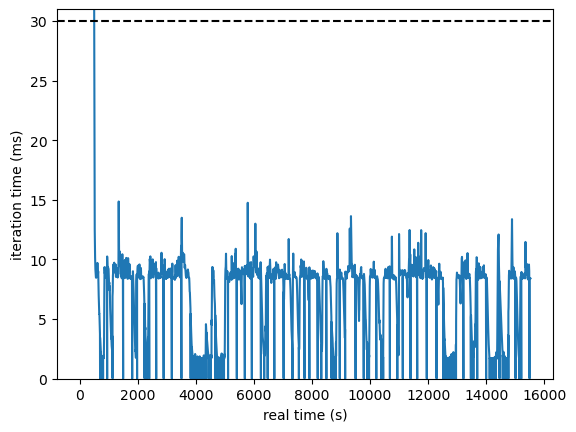

In [7]:

plt.plot((t[:-1] - t[0])*1000,np.diff(t)*1000);
plt.ylim([0, 31]);
plt.axhline(30, color='k', linestyle='--')
plt.xlabel("real time (s)")
plt.ylabel("iteration time (ms)")
plt.savefig("/home/jgould/Downloads/super_fast.svg")

In [8]:
times_dict = al.profiling_functions.get_speed_per_step(A, beh, prosvd_k=4, bw_params=bw_params, max_steps=5000)

In [9]:
keys = list(times_dict.keys())
times = np.array([times_dict[k] for k in keys])*1000

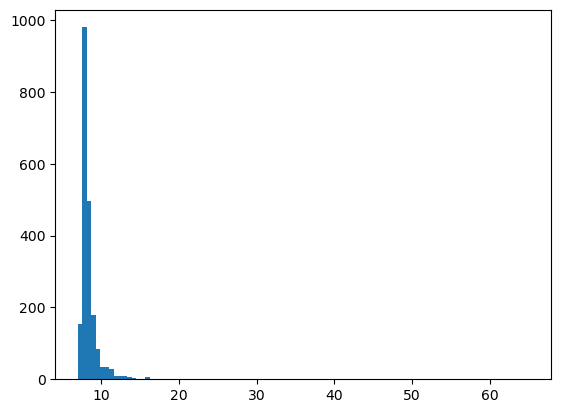

In [10]:
plt.hist(times.sum(axis=0), np.linspace(7,65,101));

Text(0, 0.5, 'iteration time (ms)')

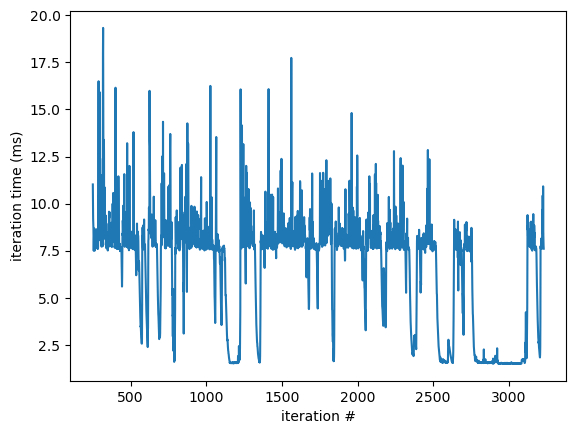

In [11]:
fig, ax = plt.subplots()
slice_start = 250
good_slice = times.sum(axis=0)[:]
ax.plot(np.arange(len(good_slice))+slice_start, good_slice)
ax.set_xlabel("iteration #");
ax.set_ylabel("iteration time (ms)")

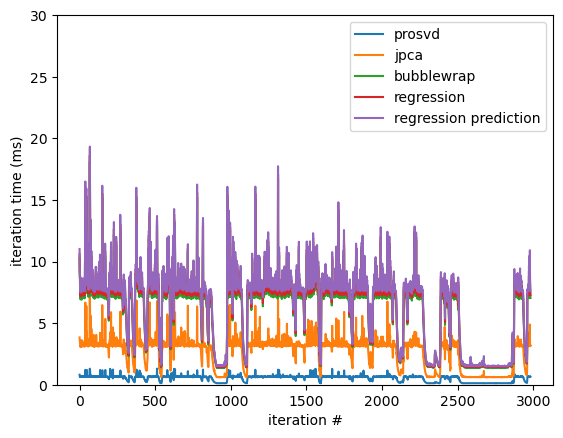

In [12]:
fig, ax = plt.subplots()
slice_start = 0
good_slice = times[:,:]
ax.plot(np.arange(good_slice.shape[1])+slice_start, np.cumsum(good_slice,0).T, label=keys)
ax.set_xlabel("iteration #");
ax.set_ylabel("iteration time (ms)")
ax.set_ylim([0,30])
ax.legend();